#Is the HIV aids epidemic rising or declining

In [25]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline
import requests
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint
import time
from datetime import datetime


In [26]:
aids= 'persons-living-with-hiv-aids-2011-2017.csv'
death= 'AIDSdeathperstate.csv'
aids = pd.read_csv(aids)
death = pd.read_csv(death)

In [27]:
aids1 = pd.DataFrame(aids)
aids1 = aids1.dropna(how='any')
aids1

,Year,Category,Group,Count
0,2011.0,Age at Year End,0-11,169.0
1,2011.0,Age at Year End,12-14,87.0
2,2011.0,Age at Year End,15-17,180.0
3,2011.0,Age at Year End,18-19,315.0
4,2011.0,Age at Year End,20-24,2971.0
...,...,...,...,...
310,2017.0,Transmission Category: Female Adult or Adolescent,Unknown risk,994.0
311,2017.0,Transmission Category: Female Adult or Adolescent,Other****,136.0
312,2017.0,Transmission Category: Child (<12 Years Old at...,Perinatal,92.0
313,2017.0,Transmission Category: Child (<12 Years Old at...,Unknown risk,16.0


In [96]:
age_year_end = aids1[aids1["Category"]=='Age at Year End']
new_df = pd.DataFrame()
for name in age_year_end['Group'].unique():
    age_groups = age_year_end.loc[age_year_end ["Group"] == name, :]
    mon = age_groups["Count"].mean()
    new_df = new_df.append(pd.Series({"Group":name, 'Mean':mon}),ignore_index =True)
new_df

,Group,Mean
0,0-11,143.428571
1,12-14,77.142857
2,15-17,134.857143
3,18-19,270.714286
4,20-24,3030.571429
5,25-29,7238.000000
6,30-34,9869.428571
7,35-39,11407.000000
8,40-44,15013.571429
9,45-49,20976.285714


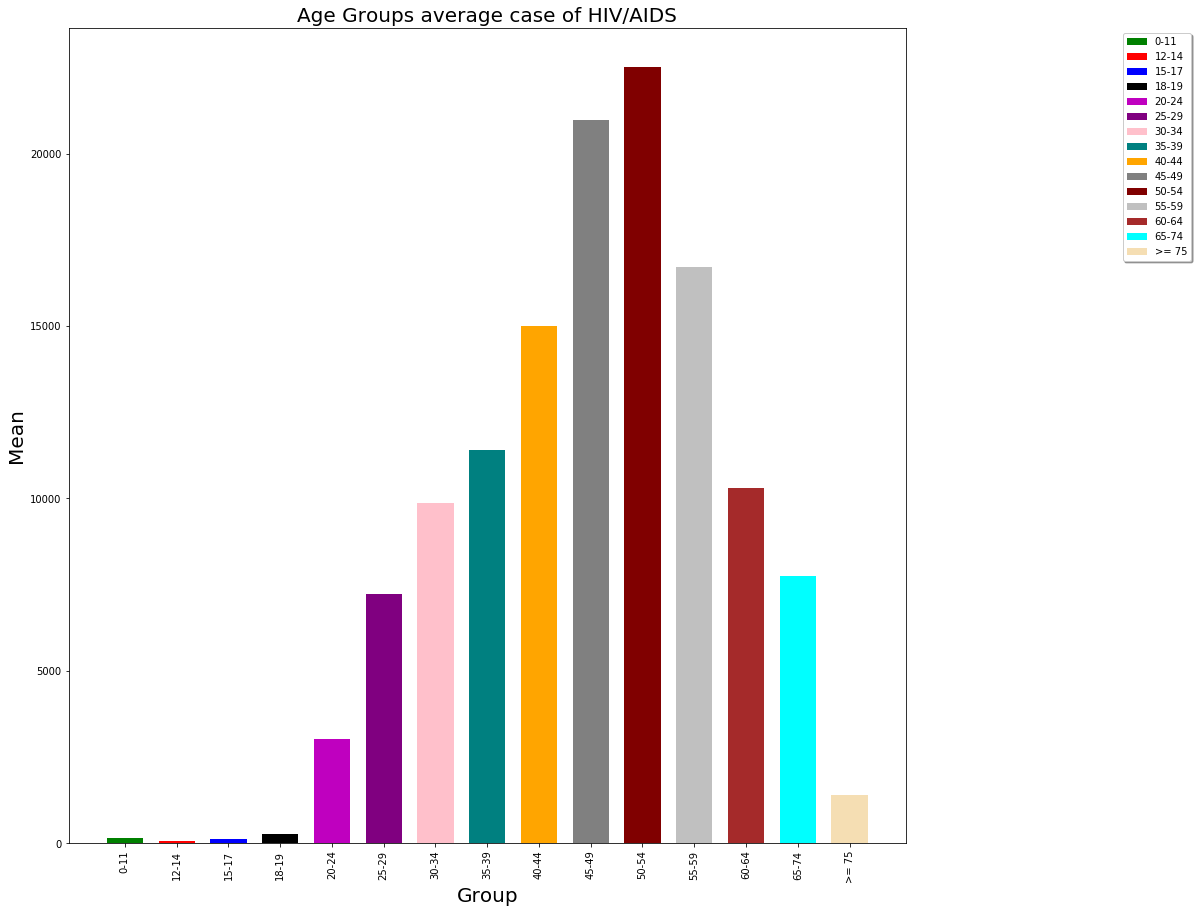

In [130]:
#bar chart per year

plt.figure(figsize=[15,15]);
x_axis = new_df ["Group"].unique()
y_axis = new_df ["Mean"].unique()
tick_locations = [value for value in x_axis]                   
tp = plt.bar(x_axis, y_axis, color=("g", "r","b","black", "m", "purple", "pink", "teal",
                                    "orange","grey","maroon","silver", "brown", "cyan", "wheat"), align="center", width =.7);

plt.xticks(tick_locations, new_df ["Group"].unique() , rotation = 'vertical')
plt.xlabel('Group',  fontsize=20)
plt.ylabel('Mean',  fontsize=20)
plt.title("Age Groups average case of HIV/AIDS", fontsize=20)
plt.legend( tp,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))

plt.savefig('Age_Groups_average_case_of_HIV(AIDS).png', bbox_inches = 'tight');
plt.show();

In [118]:
#what are the counts between 2011 to 2017
years = aids1[aids1["Year"].isin ([2011,2012, 2013, 2014, 2015, 2016, 2017])]
new_df1 = pd.DataFrame()
for name in years['Year'].unique():
    age_groups = years.loc[years ["Year"] == name, :]
    mon1 = age_groups["Count"].sum()
    new_df1 = new_df1.append(pd.Series({"Year":name, 'Sum':mon1}),ignore_index =True)
new_df1

,Sum,Year
0,473948.0,2011.0
1,486348.0,2012.0
2,496940.0,2013.0
3,505504.0,2014.0
4,517264.0,2015.0
5,531632.0,2016.0
6,540328.0,2017.0


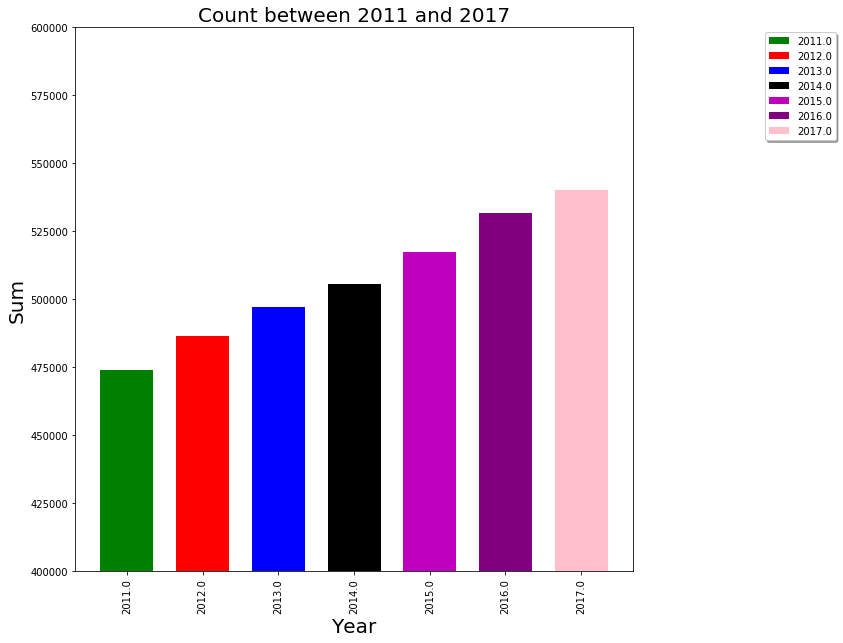

In [129]:
#bar chart per year
plt.figure(figsize=[10,10])
x_axis = new_df1 ["Year"].unique()
y_axis = new_df1 ["Sum"].unique()
tick_locations = [value for value in x_axis]  
mp = plt.bar(x_axis, y_axis, color=("g", "r","b","black", "m", "purple", "pink"), align="center", width =.7)
plt.xticks(tick_locations, new_df1 ["Year"].unique() , rotation = 'vertical')
plt.xlabel('Year',  fontsize=20)
plt.ylabel('Sum',  fontsize=20)
plt.ylim(400000, 600000)
plt.title("Count between 2011 and 2017", fontsize=20)
plt.legend(mp,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))

plt.savefig('YearCount.png')
plt.show()

In [117]:
y_axis

array(['473948', '486348', '496940', '505504', '517264', '531632',
       '540328'], dtype=object)

In [72]:
#what are the reasons for contraction? 
contractions = aids1[aids1["Group"].isin (["Male-to-male sexual contact (MMSC)",
                                              "Injection drug use (IDU)",
                                              "MMSC and IDU",
                                          "High-risk heterosexual contact (HRH)**",
                                          "Heterosexual contact (Non-HRH)***",
                                          "Perinatal",
                                          "Unknown risk",
                                          "Other****"
                                          ])]
new_df2 = pd.DataFrame()
for name in contractions['Group'].unique():
    cat = years.loc[years ["Group"] == name, :]
    mon2 = cat["Count"].mean()
    new_df2 = new_df2.append(pd.Series({"Type":name, 'Mean':mon2}),ignore_index =True)

#new_df2 ["Mean"] = new_df2 ["Mean"].map("{:.0f}".format)
new_df2

,Mean,Type
0,85485.571429,Male-to-male sexual contact (MMSC)
1,4088.928571,Injection drug use (IDU)
2,9657.571429,MMSC and IDU
3,5649.071429,High-risk heterosexual contact (HRH)**
4,3270.142857,Heterosexual contact (Non-HRH)***
5,242.333333,Perinatal
6,1519.857143,Unknown risk
7,135.850000,Other****


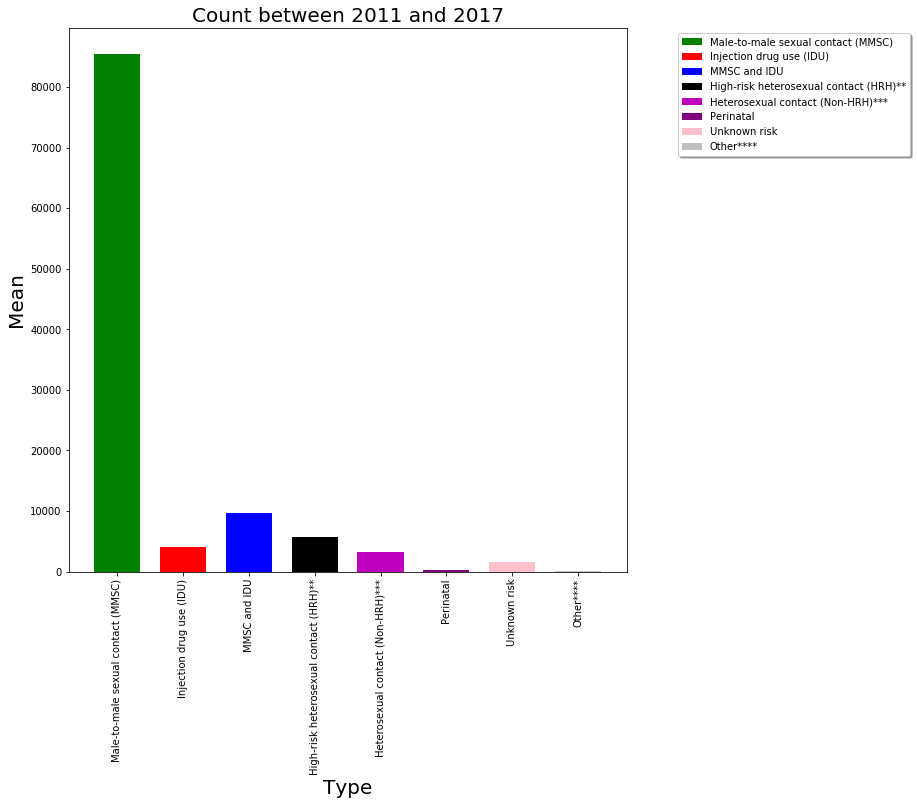

In [89]:
#bar charts
plt.figure(figsize=[10,10])
x_axis = new_df2 ["Type"].unique()
y_axis = new_df2 ["Mean"].unique()
tick_locations = [value for value in x_axis]                   
sp = plt.bar(x_axis, y_axis, color=("g", "r","b","black", "m", "purple", "pink", "silver"), align="center", width =.7)

plt.xticks(tick_locations, new_df2 ["Type"].unique() , rotation = 'vertical')
plt.xlabel('Type',  fontsize=20)
plt.ylabel('Mean',  fontsize=20)
plt.title("Count between 2011 and 2017", fontsize=20)
plt.legend( sp,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))
plt.show()

In [125]:
startyeart = pd.DataFrame(contractions)
t1 = startyeart[startyeart ["Year"]==2011.0]
t2 = startyeart[startyeart ["Year"]==2017.0]

In [126]:
t1

,Year,Category,Group,Count
28,2011.0,Transmission Category: Male Adult or Adolescent,Male-to-male sexual contact (MMSC),79109.0
29,2011.0,Transmission Category: Male Adult or Adolescent,Injection drug use (IDU),5415.0
30,2011.0,Transmission Category: Male Adult or Adolescent,MMSC and IDU,10028.0
31,2011.0,Transmission Category: Male Adult or Adolescent,High-risk heterosexual contact (HRH)**,3317.0
32,2011.0,Transmission Category: Male Adult or Adolescent,Heterosexual contact (Non-HRH)***,2979.0
33,2011.0,Transmission Category: Male Adult or Adolescent,Perinatal,257.0
34,2011.0,Transmission Category: Male Adult or Adolescent,Unknown risk,2914.0
35,2011.0,Transmission Category: Male Adult or Adolescent,Other****,289.0
36,2011.0,Transmission Category: Female Adult or Adolescent,Injection drug use (IDU),3030.0
37,2011.0,Transmission Category: Female Adult or Adolescent,High-risk heterosexual contact (HRH)**,7470.0


In [127]:
t2

,Year,Category,Group,Count
298,2017.0,Transmission Category: Male Adult or Adolescent,Male-to-male sexual contact (MMSC),91436.0
299,2017.0,Transmission Category: Male Adult or Adolescent,Injection drug use (IDU),5181.0
300,2017.0,Transmission Category: Male Adult or Adolescent,MMSC and IDU,9294.0
301,2017.0,Transmission Category: Male Adult or Adolescent,High-risk heterosexual contact (HRH)**,3653.0
302,2017.0,Transmission Category: Male Adult or Adolescent,Heterosexual contact (Non-HRH)***,4443.0
303,2017.0,Transmission Category: Male Adult or Adolescent,Perinatal,293.0
304,2017.0,Transmission Category: Male Adult or Adolescent,Unknown risk,4623.0
305,2017.0,Transmission Category: Male Adult or Adolescent,Other****,240.0
306,2017.0,Transmission Category: Female Adult or Adolescent,Injection drug use (IDU),2788.0
307,2017.0,Transmission Category: Female Adult or Adolescent,High-risk heterosexual contact (HRH)**,8098.0


In [ ]:
#what race/ethnicity is affected the most

In [ ]:
#pie chart

In [45]:
#what gender is mostly affected?
contractions1 = aids1[aids1["Group"].isin (["Cisgender men",
                                              "Cisgender women",
                                              "Transgender women",
                                          "Transgender men",
                                          "Alternative Gender"
                                          ])]
new_df5 = pd.DataFrame()
for name in contractions1['Group'].unique():
    cat1 = years.loc[years ["Group"] == name, :]
    mon5 = cat1["Count"].mean()
    new_df5 = new_df5.append(pd.Series({"Type":name, 'Mean':mon5}),ignore_index =True)

new_df5 ["Mean"] = new_df5 ["Mean"].map("{:.0f}".format)
new_df5

,Mean,Type
0,110239,Cisgender men
1,14915,Cisgender women
2,1656,Transgender women
3,41,Transgender men
4,5,Alternative Gender


ValueError: could not convert string to float: 'Cisgender men'

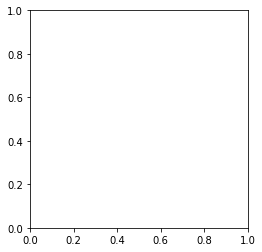

In [47]:
#pie chart
plt.pie( new_df5, explode = (0.1, 0), labels = new_df5['Type'].unique (), colors = ["red","lightskyblue", "indigo", "springgreen", "lightcoral"], autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Gender breakdown for HIV/AIDS")

In [117]:
startyearg = pd.DataFrame(contractions1)
s1 = startyearg[startyearg ["Year"]==2011.0]
s2 = startyearg[startyearg ["Year"]==2017.0]

In [118]:
s1

,Year,Category,Group,Count
15,2011.0,Current Gender,Cisgender men,102868.0
16,2011.0,Current Gender,Cisgender women,14064.0
17,2011.0,Current Gender,Transgender women,1515.0
18,2011.0,Current Gender,Transgender men,35.0
19,2011.0,Current Gender,Alternative Gender,5.0


In [119]:
s2

,Year,Category,Group,Count
285,2017.0,Current Gender,Cisgender men,117421.0
286,2017.0,Current Gender,Cisgender women,15813.0
287,2017.0,Current Gender,Transgender women,1790.0
288,2017.0,Current Gender,Transgender men,53.0
289,2017.0,Current Gender,Alternative Gender,5.0


In [ ]:
#bar chart

In [138]:
#what state has the highest death rate per year
deathps = pd.DataFrame(death)
deathpss = deathps.groupby(["Geography"], as_index=False)["Population"].mean()
deathpss.head(10)

,Geography,Population
0,Alabama,4.052344e+06
1,Alaska,5.977794e+05
2,Arizona,5.576946e+06
3,Arkansas,2.460617e+06
4,California,3.202790e+07
5,Colorado,4.458998e+06
6,Connecticut,3.053278e+06
7,Delaware,7.862490e+05
8,District of Columbia,5.715960e+05
9,Florida,1.705240e+07


In [ ]:
#scatterplot state population vs. aids death per year
plt.scatter(deathps["Geography",tumorv)
plt.xticks(weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Capomulin's tumor volume vs mouse weight")
plt.show()